In [2]:
import os
import json

In [3]:
with open('data/question_db.json', 'r') as f:
    questions = json.load(f)

In [4]:
"""
How much questions?
14300

How much duplicated?
"""

14300

In [5]:
print(len(questions))

14300


In [17]:
lowers = [q['question'].lower() for q in questions]
len(set(lowers))

14200

In [18]:
from Levenshtein import distance

In [68]:
# distance(lowers[0], lowers[1])
import numpy as np
from tqdm.notebook import tqdm

restrict = len(lowers)

idx1, idx2 = np.triu_indices(restrict)

dists = np.zeros((restrict, restrict))

similars = []

for i, j in tqdm(zip(idx1, idx2), total=restrict):
    if i != j:
        d = distance(lowers[i], lowers[j])
        dists[i, j] = d
        if d <= 2:
            similars.append((i, j, d))



  0%|          | 0/14300 [00:00<?, ?it/s]

In [69]:
print(len(similars))
for i, j, d in similars:
    print('*****')
    print(d)
    print(lowers[i])
    print(lowers[j])
    print()

548
*****
1
name something people bet on
name someting people bet on

*****
1
name something tha can be pumped
name something that can be pumped

*****
1
name a decoration you might find inside a mexican restaurant
name a decoration you might find inside a mexican restaurant.

*****
2
name something santa does that you wouldn’t want your house guest to do.
name something santa does, that you wouldn’t want your house guests to do.

*****
1
name a night of the week when people stay up later than usual
name a night of the week when people stay up later than usual.

*****
0
besides toys, name something a kid might receive at christmas.
besides toys, name something a kid might receive at christmas.

*****
1
besides toys, name something a kid might receive at christmas.
besides toys, name something a kid might receive at christmas

*****
1
name a specific type of doctor.
name a specific type of doctor

*****
1
name something you wear that might be plaid.
name something you wear that might be

In [64]:
print(len(similars))
for i, j, d in similars:
    if d == 3:
        print('*****')
        print(lowers[i])
        print(lowers[j])
        print()



85
*****
name a word or phrase that ends in – phobia
name a word or phrase that ends in -phobia.

*****
name something you put in your mouth but don’t swallow
name something you put in your mouth but do not swallow.

*****
name an unhealthy ingredient you often see in kids cereal
name an unhealthy ingredient you often see in kids’ cereals.

*****
name a a synonym for marriage that doesn’t make it sound fun
name a synonym for marriage that doesn’t make it sound fun.

*****
name something a boy scout wouldnâ€™t need to start a fire, but you do
name something a boy scout wouldn’t need to start a fire, but you do



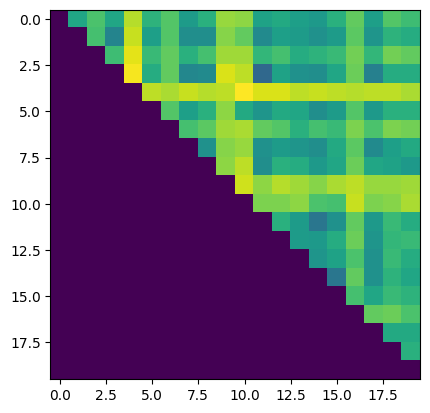

In [45]:
import matplotlib.pyplot as plt

plt.imshow(dists)

In [77]:
idx_to_delete = []

for i, j, d in similars:
    idx_to_delete.append(j)
print(idx_to_delete)

[5778, 9568, 80, 72, 4080, 191, 3776, 7743, 2520, 3873, 1704, 3224, 997, 654, 2169, 3886, 3211, 2469, 3948, 13145, 3192, 2668, 3974, 2601, 3022, 2934, 4000, 2703, 3137, 3105, 2240, 3776, 3912, 3713, 3231, 1831, 788, 6672, 1693, 2186, 926, 795, 797, 804, 701, 736, 738, 1122, 6447, 11835, 12844, 752, 13065, 859, 5239, 9570, 577, 10622, 742, 844, 2348, 2349, 987, 807, 7811, 764, 4354, 10809, 5354, 7807, 4064, 5407, 5260, 5274, 5393, 4097, 12732, 8139, 4106, 1577, 1594, 1968, 7774, 1747, 1579, 1795, 1757, 1548, 2233, 1860, 2734, 2237, 1706, 7445, 2210, 7351, 2137, 2239, 2224, 6677, 1912, 7513, 7521, 11537, 2186, 1743, 7525, 7389, 2610, 4224, 2503, 1809, 10666, 13093, 4079, 7772, 7797, 7499, 4129, 4246, 7500, 2095, 4102, 9167, 2189, 4153, 12405, 2250, 2729, 6610, 7732, 12031, 2660, 2538, 10518, 2512, 12100, 2349, 7759, 7744, 2466, 6420, 11948, 4265, 3113, 2582, 2956, 2956, 10517, 10496, 7729, 4257, 10480, 5996, 10494, 4101, 10532, 4096, 4120, 12891, 7700, 10521, 10541, 7692, 10522, 10690, 8

In [81]:
idx_to_delete = set(idx_to_delete)

questions_levenstein = [q for i, q in enumerate(questions) if i not in idx_to_delete]

len(questions_levenstein)

13814

In [83]:
lowers = [q['question'].lower() for q in questions_levenstein]
len(set(lowers))


restrict = len(lowers)

idx1, idx2 = np.triu_indices(restrict)

dists = np.zeros((restrict, restrict))

similars = []

for i, j in tqdm(zip(idx1, idx2), total=restrict):
    if i != j:
        d = distance(lowers[i], lowers[j])
        dists[i, j] = d
        if d <= 2:
            print('wow')
            similars.append((i, j, d))

print(similars)

  0%|          | 0/13814 [00:00<?, ?it/s]

[]


In [85]:
# Save deduplicated
with open('data/question_db_2.json', 'w') as f:
    json.dump(questions_levenstein, f, indent=4)

In [86]:
###
###

name a number that’s associated with being lucky or unlucky
name the most used piece of furniture in a house.
name a job in which an attractive person probably makes better tips.
name a prop used by tap dancers
if you drew homer simpson’s name in a secret santa exchange, what would you buy him?
name something you do to an item before giving it as a gift
name a place where it might be romantic to get stranded with your partner
name a good gift for someone who is always late.
why might a family move into a bigger house?
other than movie tickets, name something a crowded movie theatre might run out of.
name something you should probably book ahead of time if you’re going on vacation.
name something people bet on
name a character who’s known for almost ruining christmas.
name a city where you’d hate the long commute to work.
name something that’s not allowed in some hotels.
name something that might happen if you eat while driving.
if adults trick or treated, what might they request instea